# Intro

This project focuses on predicting customer churn for a telecommunications company using machine learning techniques. The process includes data importing, exploration, and preprocessing (handling missing values, encoding categorical variables, and scaling numerical features). Various models, such as Logistic Regression, Random Forest, Support Vector Machines (SVM), and XGBoost, are built and evaluated based on accuracy, precision, recall, and F1 score. Additionally, the best-performing model is optimized using GridSearchCV for hyperparameter tuning. The goal is to develop a robust churn prediction model that helps businesses reduce customer attrition and improve customer retention strategies.

# Steps



1. **Importing Libraries**  
   Import necessary libraries for data manipulation, visualization, and modeling.

2. **Loading the Dataset**  
   Load the customer churn dataset using `pandas`.

3. **Exploratory Data Analysis (EDA)**  
   Analyze data distribution, correlations, missing values, and target variable distribution.

4. **Handling Outliers**  
   Detect and handle outliers using the **IQR method** to improve model performance.

5. **Cleaning and Transforming Data**  
   - **One-hot Encoding**: Convert categorical features to numeric.
   - **Feature Scaling**: Scale numerical features to a uniform range.
   - **Feature Selection**: Select relevant features for modeling.

6. **Model Training and Prediction**  
   - **Logistic Regression**: Train and evaluate.
   - **Support Vector Machine (SVM)**: Train and evaluate.
   - **Decision Tree Classifier**: Train and evaluate.

7. **Model Comparison and Final Evaluation**  
   Compare model performance using accuracy, precision, recall, and F1-score.


# Importing Dependencies

In [54]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Load Data

In [55]:
df = pd.read_csv(r'D:\projects\z datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Check Unique Values for Non-Numeric Columns

In [58]:
# apply loop check unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


##### Churn Distribution Analysis

In [59]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [60]:
churn_percentage = (df["Churn"].value_counts(normalize=True) * 100).round()

# Display the result
print(churn_percentage)

Churn
No     73.0
Yes    27.0
Name: proportion, dtype: float64


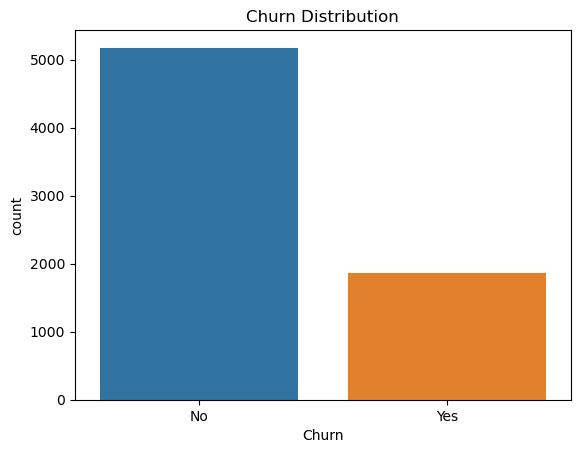

In [61]:
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()


In [62]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [63]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

#### Visualize Distributions of Numeric Features

In [64]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=["float64", "int64"])

In [65]:
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


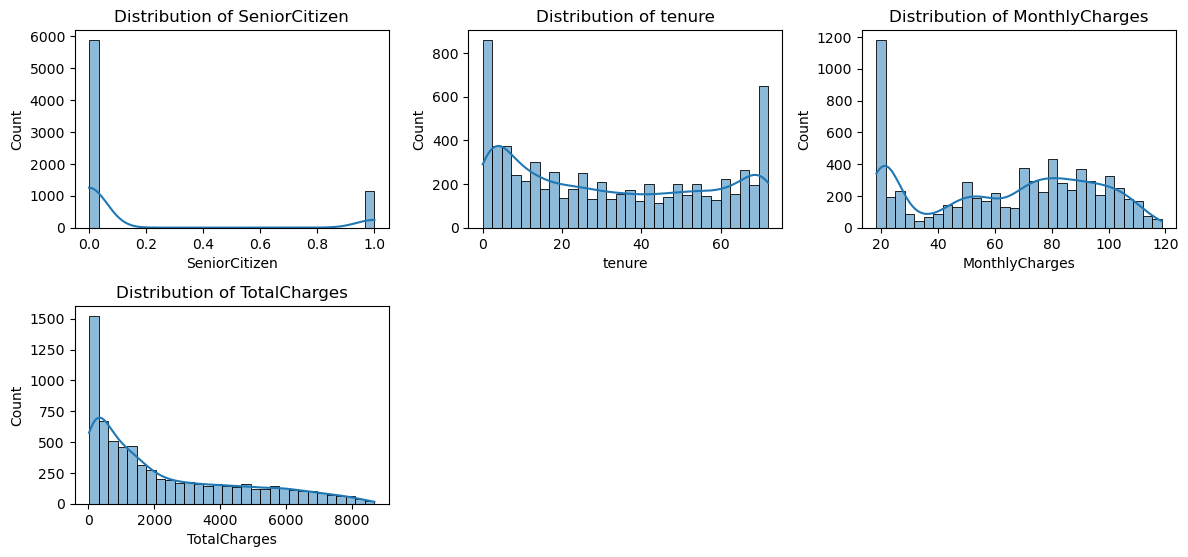

In [66]:
# Plot histogram for each numeric feature in the numeric_df DataFrame
plt.figure(figsize=(12, 8))
for column in numeric_df.columns:
    plt.subplot(3, 3, numeric_df.columns.get_loc(column) + 1)  # Adjust grid for your number of features
    sns.histplot(numeric_df[column], kde=True, bins=30)  # KDE for smoothed density curve
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

##### Correlation Heatmap of Numeric Features

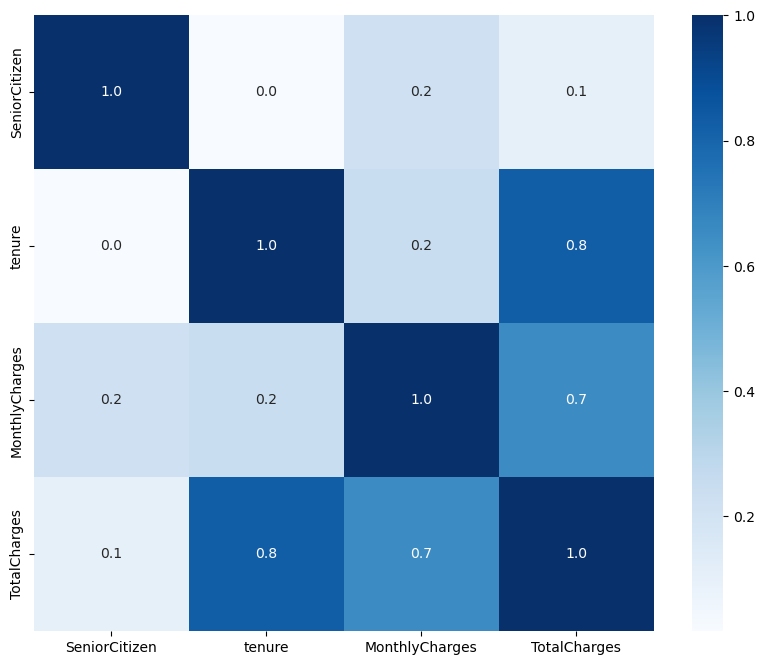

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt='.1f')
plt.show()


#### Visualizing 'Tenure' Distribution Based on Churn

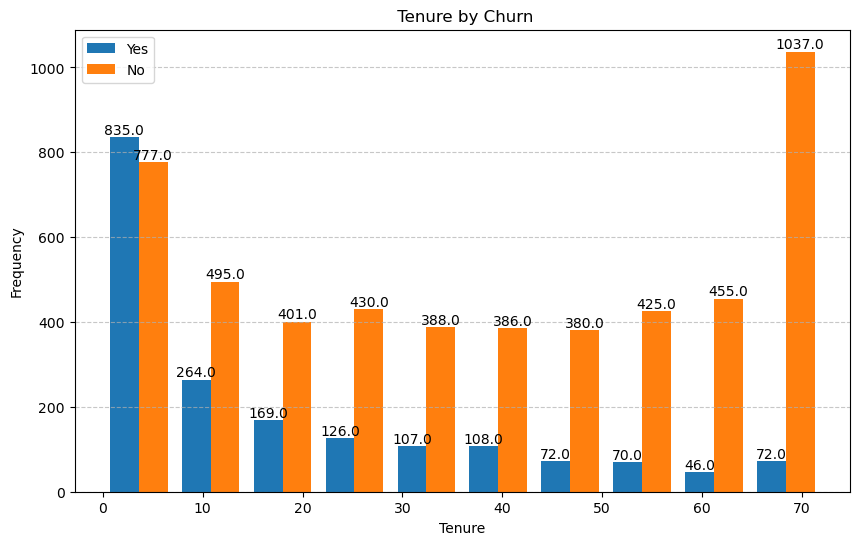

In [68]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

In [69]:
# List of categorical columns to encode
categorical_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", 
                    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 
                    "StreamingTV", "StreamingMovies", "PaperlessBilling", "InternetService", 
                    "Contract", "PaymentMethod"]

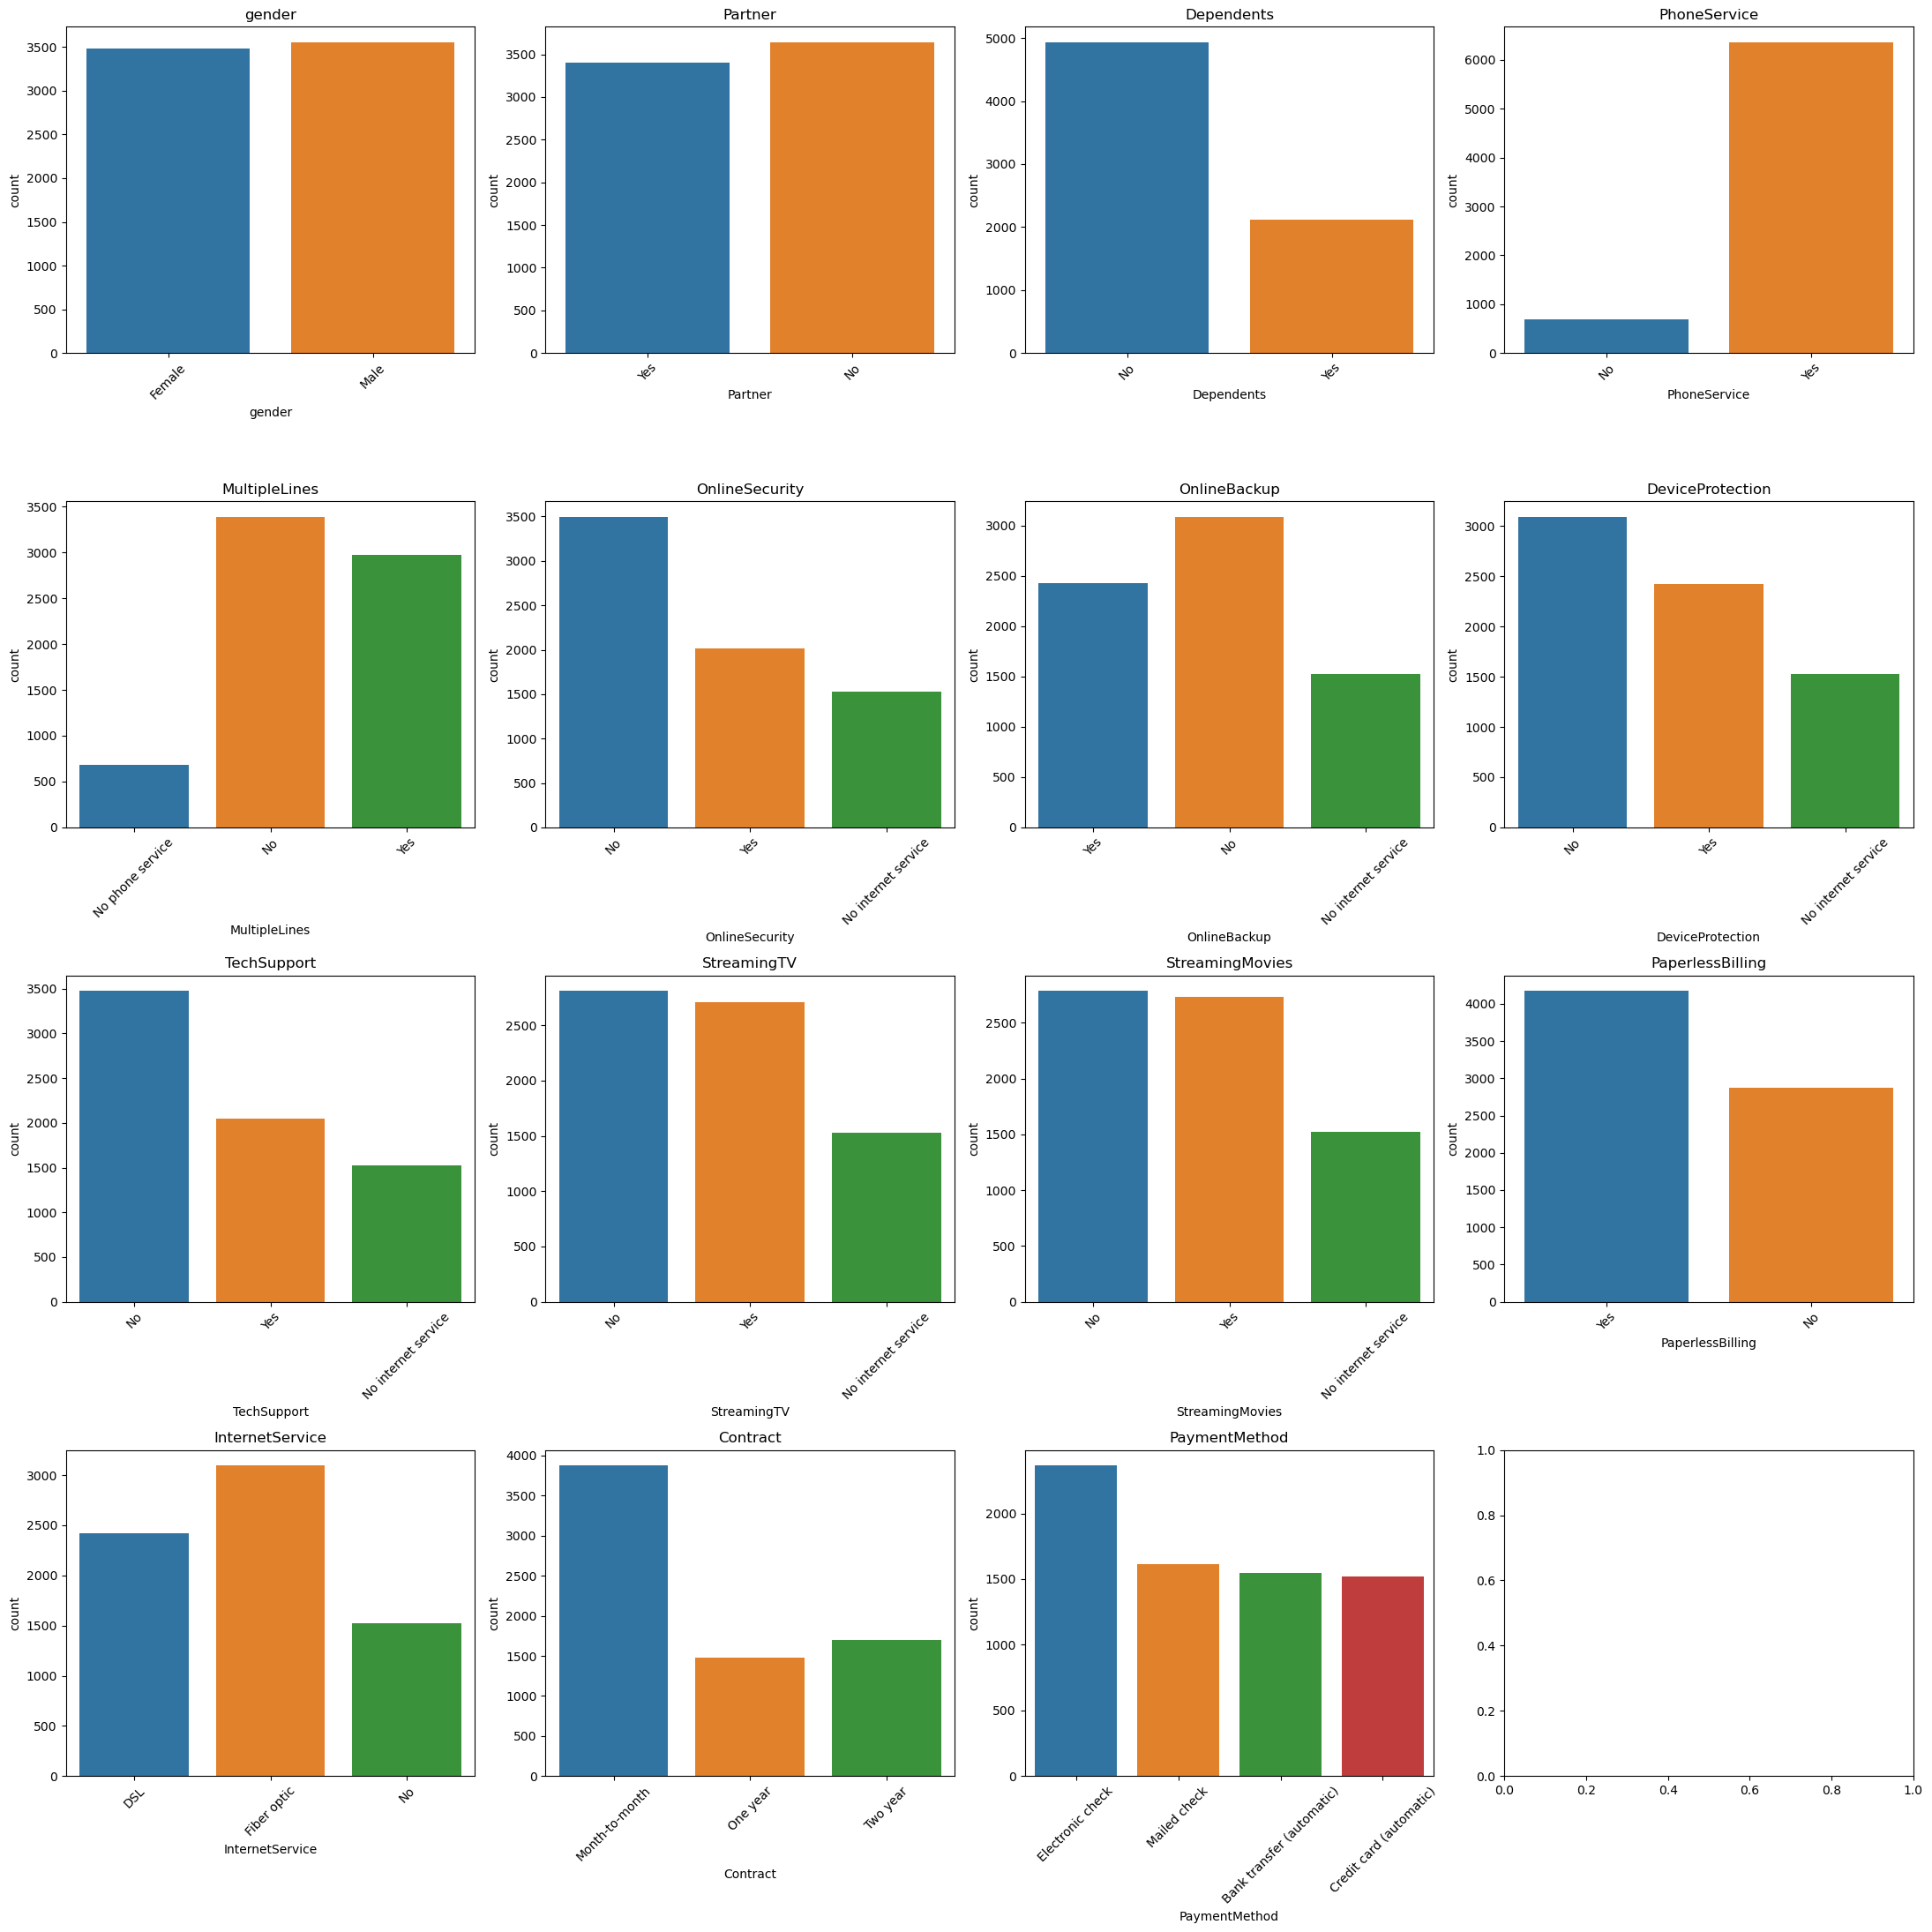

In [70]:

ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(22, 22))
row, col = 0, 0

for i, categorical_col in enumerate(categorical_cols):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    sns.countplot(x=categorical_col, data=df, ax=ax[row, col])
    ax[row, col].set_title(categorical_col)
    ax[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust layout for better fit
plt.show()

Text(0.5, 1.0, 'churned')

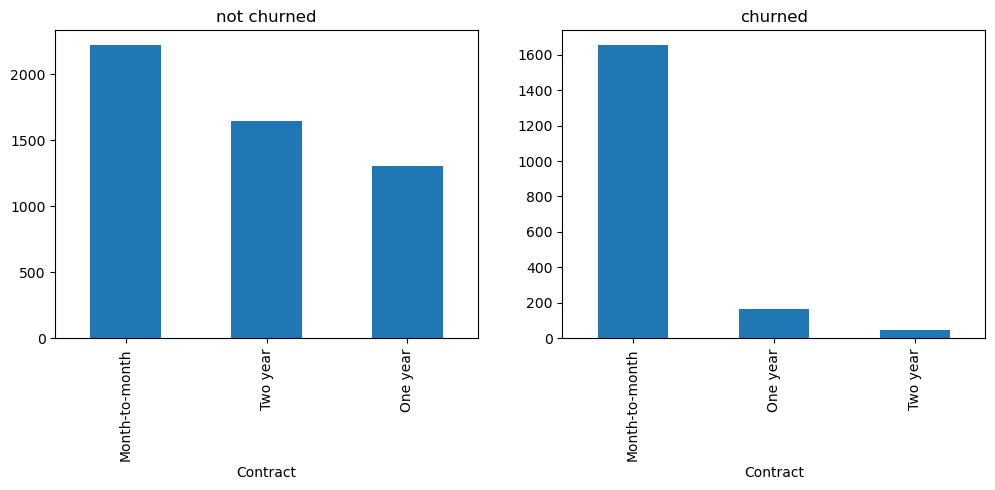

In [71]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

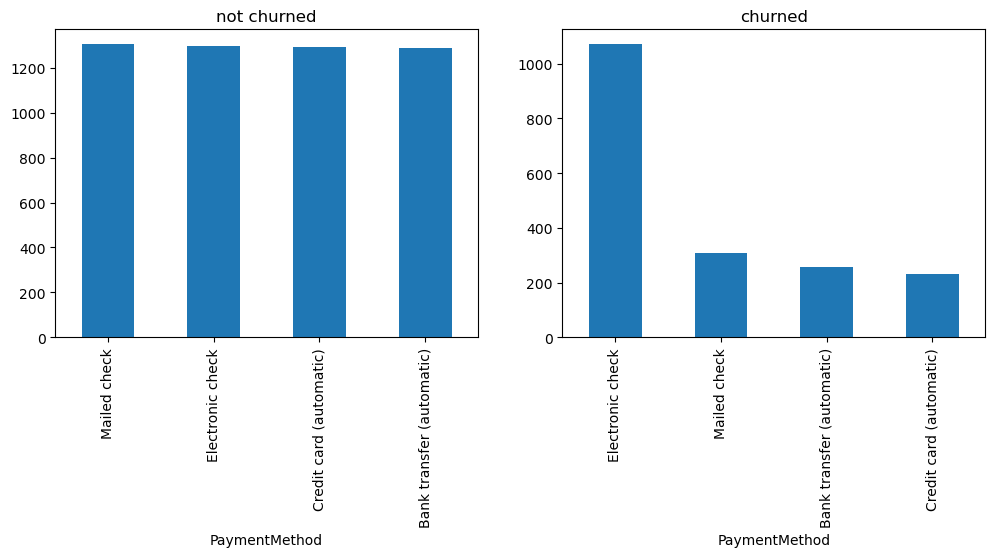

In [72]:
feature = 'PaymentMethod'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

In [73]:

# One-hot encode multi-class categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#### Data Scaling

In [74]:
scaler = preprocessing.StandardScaler()
df[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df[["tenure", "MonthlyCharges", "TotalCharges"]])

##### Drop unnecessary columns

In [75]:
df = df.drop(columns=["customerID"])
df.dropna(inplace=True)

#### Map 'Churn' to Binary Values

In [76]:
# Convert 'Churn' values to 1 (Yes) and 0 (No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

#### Split Data into Features and Target

In [77]:
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target variable

- Train Test Split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models Training and Evaluation

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [80]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [81]:
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    """
    Trains the given classifier on the training data and evaluates on the test data.

    Args:
    - classifier: The classifier model to be used (e.g., LogisticRegression, RandomForestClassifier, etc.)
    - X_train: Training features
    - y_train: Training target variable
    - X_test: Test features
    - y_test: Test target variable
    
    Returns:
    - accuracy: Accuracy score of the classifier on the test set
    - report: Classification report for the classifier
    """
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Output the results
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)

    return accuracy, report

## Logistic Regression

In [83]:
lr = LogisticRegression()

lr_accuracy, lr_report = evaluate_classifier(lr, X_train, y_train, X_test, y_test)


Accuracy: 0.8211
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



- **Accuracy**: 0.8211
- **Classification Report**:
  - **Precision** for class 0 (not churned): 0.86
  - **Recall** for class 0: 0.90
  - **Precision** for class 1 (churned): 0.69
  - **Recall** for class 1: 0.60

**Key Insights**:
- Logistic Regression performs well in predicting non-churned customers, with a high recall of 0.90 for class 0.
- The model struggles with predicting churned customers (class 1), showing a low recall of 0.60.
- **Weighted Average**: 0.82, indicating a decent balance between precision and recall.

## Random Forest

In [84]:
rf = RandomForestClassifier()

rf_accuracy, rf_report = evaluate_classifier(rf, X_train, y_train, X_test, y_test)


Accuracy: 0.7970
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409




- **Accuracy**: 0.7970
- **Classification Report**:
  - **Precision** for class 0: 0.83
  - **Recall** for class 0: 0.91
  - **Precision** for class 1: 0.66
  - **Recall** for class 1: 0.47

**Key Insights**:
- Random Forest shows a good recall for class 0 (non-churned) but struggles with churned customers, yielding a low recall of 0.47.
- The model has decent precision for churned customers (0.66), but it fails to predict the minority class effectively.
- **Weighted Average**: 0.79, slightly lower than Logistic Regression.


## SVM

In [85]:
svm = SVC()

svm_accuracy, svm_report = evaluate_classifier(svm, X_train, y_train, X_test, y_test)


Accuracy: 0.8141
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.52      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409




- **Accuracy**: 0.8141
- **Classification Report**:
  - **Precision** for class 0: 0.84
  - **Recall** for class 0: 0.92
  - **Precision** for class 1: 0.70
  - **Recall** for class 1: 0.52

**Key Insights**:
- SVM also performs well on class 0, with a high recall of 0.92.
- The model's recall for churned customers (0.52) is not strong, indicating it misses a significant portion of churned customers.
- **Weighted Average**: 0.80, suggesting a good overall balance, but still not ideal for predicting churn.


## XGBoost

In [87]:
xgboost = XGBClassifier(use_label_encoder= False, eval_metric= 'logloss')

xg_accuracy, xg_report = evaluate_classifier(xgboost, X_train, y_train, X_test, y_test)


Accuracy: 0.7984
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



C:\Users\E_Hom\anaconda3\envs\mlkernel\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:51:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



- **Accuracy**: 0.7984
- **Classification Report**:
  - **Precision** for class 0: 0.84
  - **Recall** for class 0: 0.89
  - **Precision** for class 1: 0.64
  - **Recall** for class 1: 0.54
  
**Key Insights**:
- XGBoost performs similarly to Random Forest, with high recall for non-churned customers (0.89).
- It still struggles with churned customers, with a recall of 0.54.
- **Weighted Average**: 0.79, similar to Random Forest.


### Random Forest with Grid SearchCV


In [88]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [89]:
rf2 = RandomForestClassifier(max_depth= 10, min_samples_split= 10, n_estimators= 300)
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Random Forest Accuracy: 0.8112136266855926
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409




- **Accuracy**: 0.8112
- **Classification Report**:
  - **Precision** for class 0: 0.84
  - **Recall** for class 0: 0.92
  - **Precision** for class 1: 0.69
  - **Recall** for class 1: 0.52

**Key Insights**:
- Random Forest with Grid SearchCV optimizes the hyperparameters, yielding the highest accuracy (81.12%).
- The recall for churned customers remains low (0.52), similar to other models, indicating that the model still has difficulty predicting the minority class.
- **Weighted Average**: 0.80, showing a good balance between precision and recall.



# Conclusion

## This document provides an analysis of several machine learning models applied to predict customer churn. The following models were evaluated:

- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
- XGBoost
- Random Forest with Grid SearchCV

## Key Metrics:
For each model, the following evaluation metrics were used:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**
- **Classification Report**



### Summary of Model Performance:
- **Best Model in Terms of Accuracy**: Logistic Regression (82.11% accuracy).
- **Best Model for Class Balance**: Random Forest with Grid SearchCV (weighted average of 0.80).
- **Best Model for Precision on Class 0 (Non-churned)**: Logistic Regression (precision of 0.86).
- **Best Model for Precision on Class 1 (Churned)**: SVM (precision of 0.70).

### Common Observations:
- All models struggled with predicting churned customers (class 1), as evidenced by their lower recall for class 1.
- Models performed much better on predicting non-churned customers (class 0) with high precision and recall.


